<a href="https://colab.research.google.com/github/erobrien6/OBrien_DSPN_S23/blob/main/Exercise_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [6]:
set.seed(12345)
# sample_size <- 100 
# beta_0 <- 6
# beta_1 <- 24
# beta_2 <- 8
# beta_3 <- 12

set.seed(12345)
simulate_data <- function(sample_size, beta_0, beta_1, beta_2, beta_3) {
  x = rnorm(n = 100)
  error = rnorm(n = 100)
  Y <- beta_0 + beta_1*x + beta_2*(x^2) + beta_3*(x^3) + e
  return(data.frame(x,Y))
}
df_subset <- simulate_data(100, 6, 24, 8, 12)
head(df_subset)
dim(df_subset)

,x,Y
,<dbl>,<dbl>
1,0.5855288,25.428309
2,0.7094660,30.182946
3,-0.1093033,3.879046
4,-0.4534972,-5.682603
5,0.6058875,26.288233
6,-1.8179560,-83.826626


[1] 100   2

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [4]:
install.packages("leaps")
library(leaps)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
# For loop for simulating data
set.seed(12345)
for (i in 2:10) {
  df_subset[paste0("x^",i)] <- df_subset$x^i
}

head(df_subset)

,x,Y,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5855288,25.428309,0.34284400,0.20074504,1.175420e-01,6.882423e-02,4.029857e-02,2.359597e-02,1.381612e-02,8.089738e-03,4.736775e-03
2,0.7094660,30.182946,0.50334203,0.35710407,2.533532e-01,1.797455e-01,1.275233e-01,9.047346e-02,6.418784e-02,4.553909e-02,3.230844e-02
3,-0.1093033,3.879046,0.01194721,-0.00130587,1.427359e-04,-1.560151e-05,1.705297e-06,-1.863946e-07,2.037355e-08,-2.226896e-09,2.434071e-10
4,-0.4534972,-5.682603,0.20565969,-0.09326609,4.229591e-02,-1.918107e-02,8.698563e-03,-3.944774e-03,1.788944e-03,-8.112809e-04,3.679136e-04
5,0.6058875,26.288233,0.36709961,0.22242105,1.347621e-01,8.165068e-02,4.947112e-02,2.997393e-02,1.816083e-02,1.100342e-02,6.666834e-03
6,-1.8179560,-83.826626,3.30496390,-6.00827885,1.092279e+01,-1.985714e+01,3.609941e+01,-6.562715e+01,1.193073e+02,-2.168953e+02,3.943062e+02


In [8]:
# Model
regfit_model <- regsubsets(Y ~ ., data = df_subset, nvmax=10)
reg_summary <- summary(regfit_model)
print(reg_summary)

Subset selection object
Call: regsubsets.formula(Y ~ ., data = df_subset, nvmax = 10)
10 Variables  (and intercept)
       Forced in Forced out
x          FALSE      FALSE
`x^2`      FALSE      FALSE
`x^3`      FALSE      FALSE
`x^4`      FALSE      FALSE
`x^5`      FALSE      FALSE
`x^6`      FALSE      FALSE
`x^7`      FALSE      FALSE
`x^8`      FALSE      FALSE
`x^9`      FALSE      FALSE
`x^10`     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x   `x^2` `x^3` `x^4` `x^5` `x^6` `x^7` `x^8` `x^9` `x^10`
1  ( 1 )  " " " "   "*"   " "   " "   " "   " "   " "   " "   " "   
2  ( 1 )  "*" " "   "*"   " "   " "   " "   " "   " "   " "   " "   
3  ( 1 )  "*" "*"   "*"   " "   " "   " "   " "   " "   " "   " "   
4  ( 1 )  "*" "*"   "*"   " "   "*"   " "   " "   " "   " "   " "   
5  ( 1 )  "*" "*"   "*"   " "   "*"   " "   "*"   " "   " "   " "   
6  ( 1 )  "*" "*"   "*"   " "   "*"   " "   "*"   " "   "*"   " "   
7  ( 1 )  "*" "*"   "*"   "*"

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

In [10]:
library(ggplot2)
numvar = 1:length(reg_summary$rss)# Make a vector that lists the number of variables in sequence 
allfalse = rep(FALSE,length(reg_summary$rss))

# Check
print(numvar)
print(allfalse)

 [1]  1  2  3  4  5  6  7  8  9 10
 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE


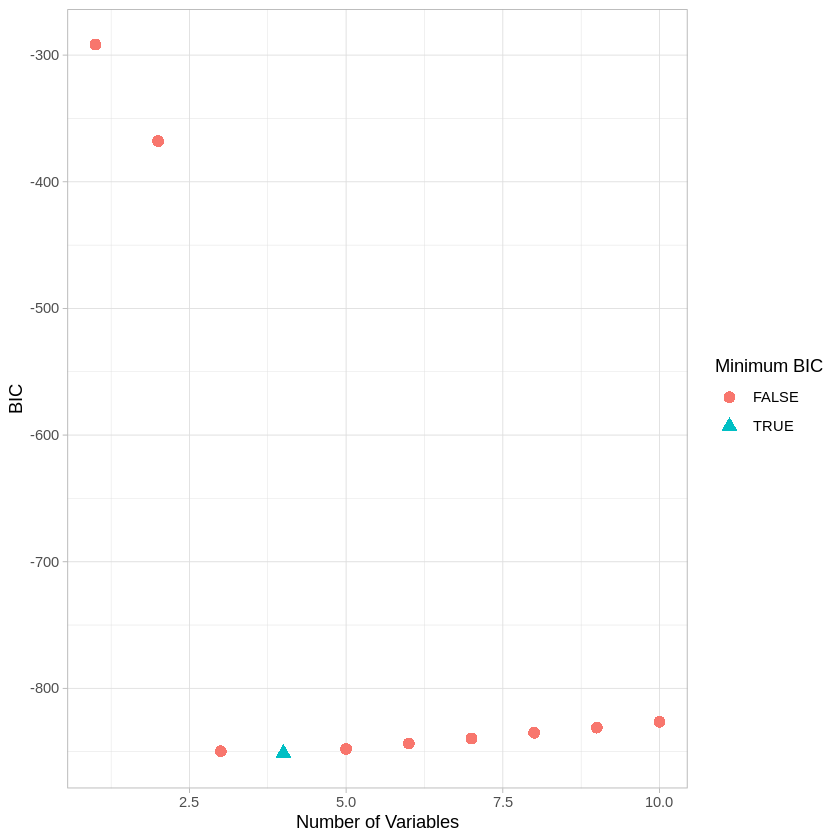

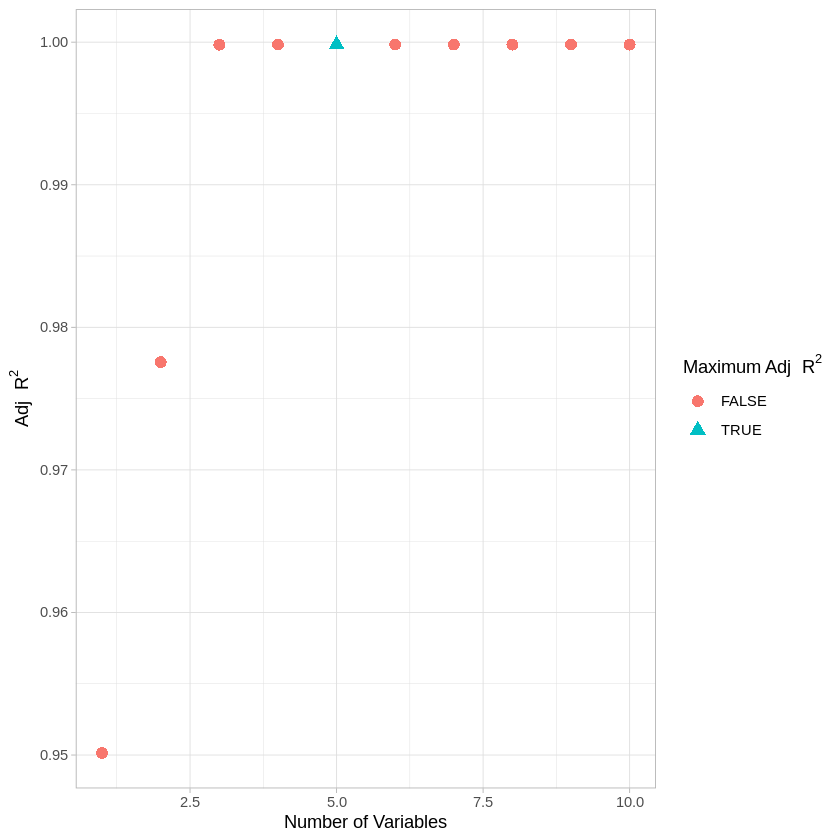

[1] 4

[1] 5

[1] 4

(Intercept)           x       `x^2`       `x^3`       `x^5` 
 6.06465518 24.46966831  7.96522221 11.58080922  0.07332804

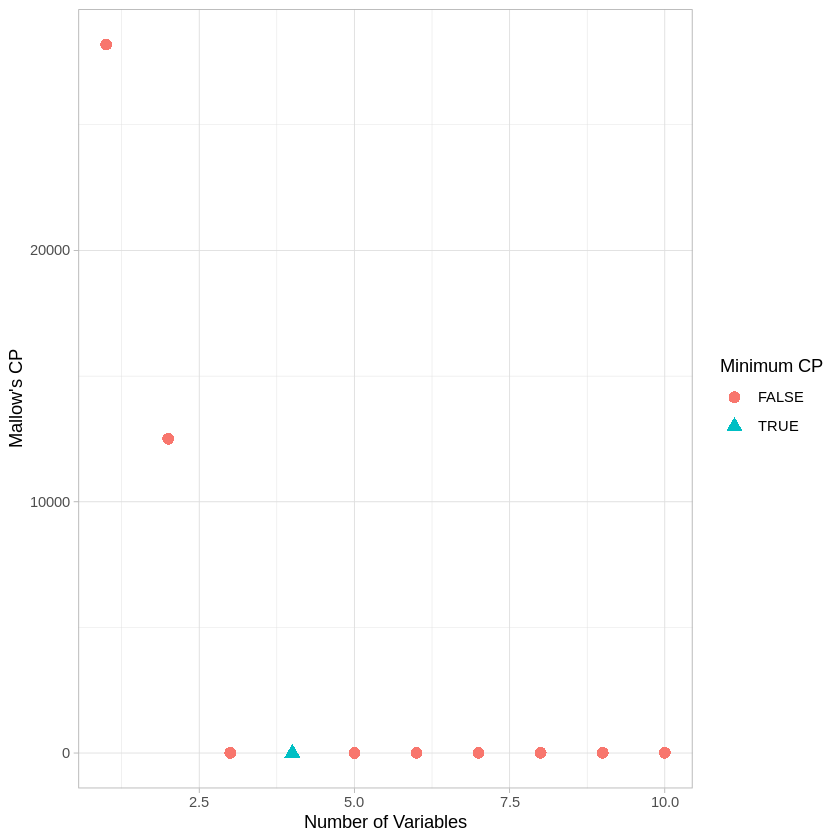

In [18]:
# BIC
bic.df <- data.frame(numvar = numvar,bic <- reg_summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg_summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg_summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg_summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg_summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg_summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Minimum CP", shape="Minimum CP")

which.min(reg_summary$bic) # 4
which.max(reg_summary$adjr2) # 5
which.min(reg_summary$cp) # 4

# Best Model coefficients
coef(regfit_model, id=4)


> *Based on the BIC, Mallow's CP, and adjusted R2, the fourth model seems to be the best overall fit (includes x, x^2, x^3, and x^5 terms). * 
> 

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., data = df_subset, method = "forward", 
    nvmax = 10)
10 Variables  (and intercept)
       Forced in Forced out
x          FALSE      FALSE
`x^2`      FALSE      FALSE
`x^3`      FALSE      FALSE
`x^4`      FALSE      FALSE
`x^5`      FALSE      FALSE
`x^6`      FALSE      FALSE
`x^7`      FALSE      FALSE
`x^8`      FALSE      FALSE
`x^9`      FALSE      FALSE
`x^10`     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          x   `x^2` `x^3` `x^4` `x^5` `x^6` `x^7` `x^8` `x^9` `x^10`
1  ( 1 )  " " " "   "*"   " "   " "   " "   " "   " "   " "   " "   
2  ( 1 )  "*" " "   "*"   " "   " "   " "   " "   " "   " "   " "   
3  ( 1 )  "*" "*"   "*"   " "   " "   " "   " "   " "   " "   " "   
4  ( 1 )  "*" "*"   "*"   " "   "*"   " "   " "   " "   " "   " "   
5  ( 1 )  "*" "*"   "*"   " "   "*"   " "   "*"   " "   " "   " "   
6  ( 1 )  "*" "*"   "*"   " "   "*"   " "   "*"   " "   "*"   " "   
7  ( 1 

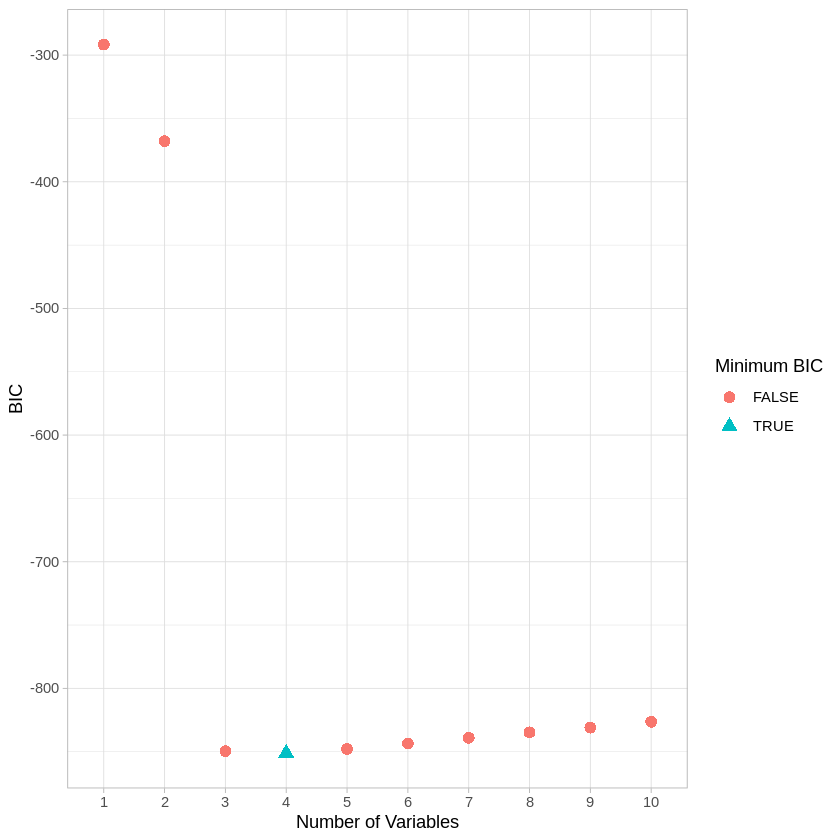

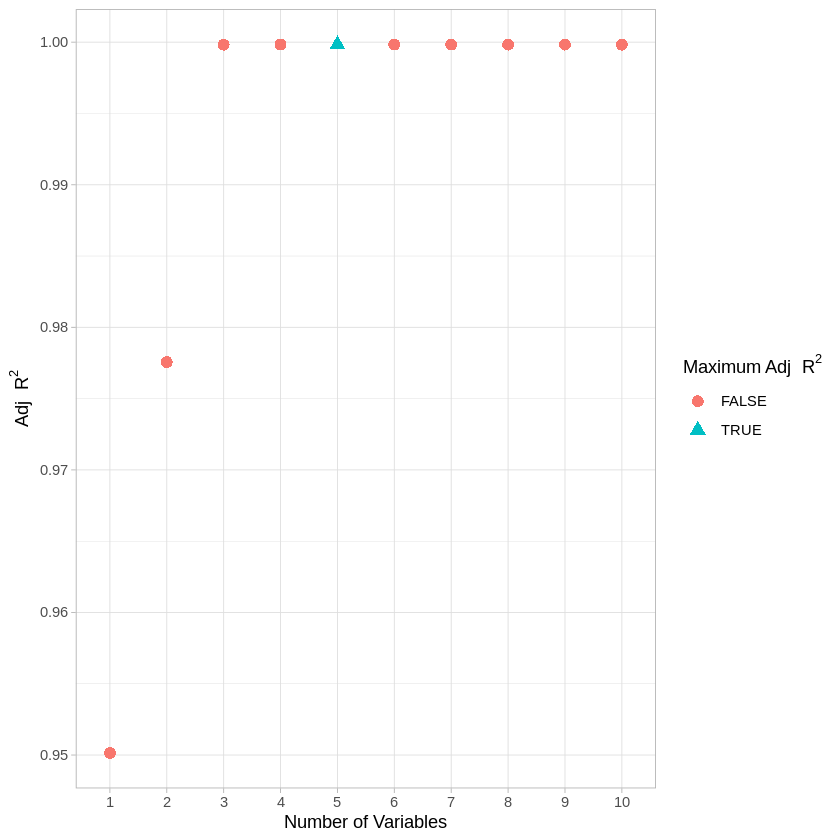

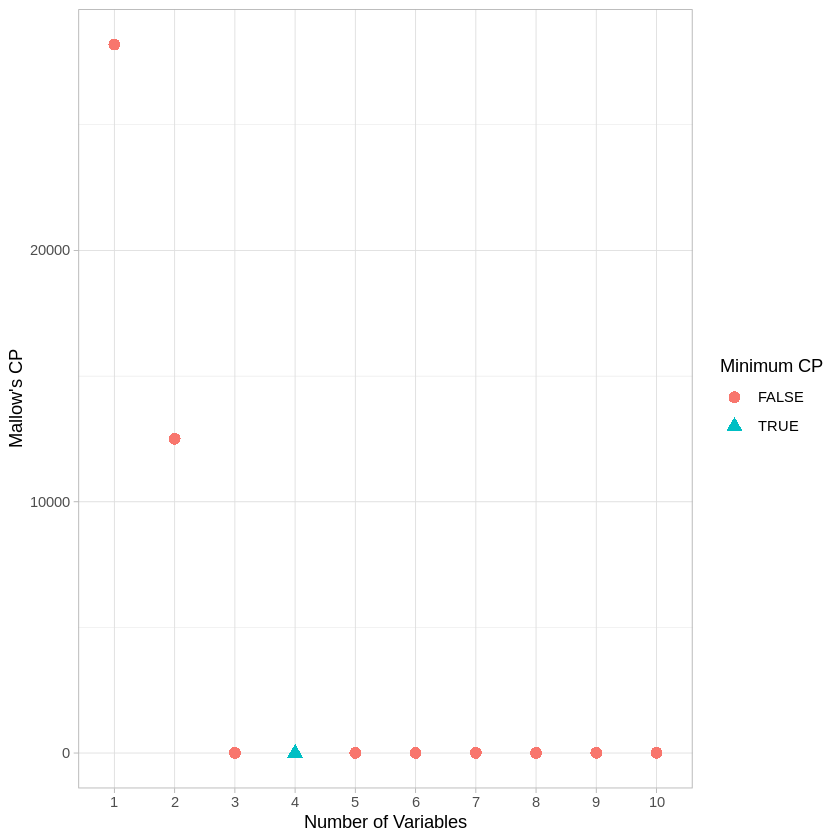

In [24]:
regfit_forward <- regsubsets(Y ~ ., data = df_subset, method='forward', nvmax=10)
forward_summary <- summary(regfit_forward)
print(forward_summary)

# BIC
bic.df <- data.frame(numvar = numvar,bic <- forward_summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(forward_summary$bic)] <- TRUE
ggplot(bic.df,aes(x=as.factor(numvar),y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- forward_summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(forward_summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=as.factor(numvar),y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- forward_summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(forward_summary$cp)] <- TRUE
ggplot(cp.df,aes(x=as.factor(numvar),y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Minimum CP", shape="Minimum CP")

forward_bic <- which.min(forward_summary$bic) # 4
forward_r2 <- which.max(forward_summary$adjr2) # 5
forward_cp <- which.min(forward_summary$cp) # 4

In [ ]:
# Best Model coefficients
coef(regfit_forward, forward_bic)
coef(regfit_forward, forward_r2)
coef(regfit_forward, forward_cp)

b) Backwards stepwise selection:

In [ ]:
regfit_back <- regsubsets(Y ~ ., data = df_subset, method='backward', nvmax=10)
backward_summary <- summary(regfit_back)
print(backward_summary)

# BIC
bic.df <- data.frame(numvar = numvar,bic <- backward_summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(backward_summary$bic)] <- TRUE
ggplot(bic.df,aes(x=as.factor(numvar),y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- backward_summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(backward_summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=as.factor(numvar),y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- backward_summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(backward_summary$cp)] <- TRUE
ggplot(cp.df,aes(x=as.factor(numvar),y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Minimum CP", shape="Minimum CP")

back_bic <- which.min(backward_summary$bic) # 4
back_r2 <- which.max(backward_summary$adjr2) # 5
back_cp <- which.min(backward_summary$cp) # 4

In [27]:
# Best Model coefficients
coef(regfit_back, back_bic)
coef(regfit_back, back_r2)
coef(regfit_back, back_cp)

(Intercept)           x       `x^2`       `x^3`       `x^5` 
 6.06465518 24.46966831  7.96522221 11.58080922  0.07332804

(Intercept)           x       `x^2`       `x^3`       `x^5`       `x^7` 
 6.06123497 24.78197946  7.95549219 10.99546702  0.30649154 -0.02474433

(Intercept)           x       `x^2`       `x^3`       `x^5` 
 6.06465518 24.46966831  7.96522221 11.58080922  0.07332804

c) Compare your results from parts a and b with those of question 1.

> *They're the same; the best overall model seems to be model 4.* 
> 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [49]:
# WRITE YOUR CODE HERE
library(tidyverse)
set.seed(1234)
n2 <- 1000
p <- 20
xnames <- paste0("x", 1:p)
beta <- c(runif(10, 1, 10), rep(0, 6)) %>% sample()
error2 <- rnorm(n2)

# Equation
Y_form <- paste0(beta, "*", xnames) %>% paste0(., collapse = "+")

# Splitting data
df_train <- sample(n2, 100)
total_df <- matrix(nrow = n2, ncol = p, dimnames = list(1:n2, xnames)) %>%
  as.data.frame() %>%
  mutate(across(everything(), ~rnorm(n2))) %>%
  mutate(Y2 = eval(parse(text = Y_form)) + error2)

train <- total_df[df_train,]
test <- total_df[-df_train,]

head(total_df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,⋯,x12,x13,x14,x15,x16,x17,x18,x19,x20,Y2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1083223,-0.5378214,-1.9110071,-0.6757286,-0.14921264,1.50785679,-0.3325382,-0.14536575,0.2946815,0.63091298,⋯,0.0003800058,1.8734317,0.9301000,-0.7877513,0.5288239,-0.6157966,-0.81792875,-0.5327131,-0.46959444,3.108448
2,0.2507904,-1.1969442,0.5907921,0.6005075,-0.09221769,0.27500363,-1.6784429,0.05290521,0.2421294,-1.27451448,⋯,1.6267111312,-0.4522252,0.3602563,-0.7284002,0.1177088,-0.1516827,-0.21764134,1.2985021,-0.07054145,8.963955
3,-1.3161934,-1.1004158,-0.3240349,1.0565807,-0.57449662,0.27673481,-1.1780727,-0.60386788,2.0474585,0.09342082,⋯,-1.4014454266,-1.5600299,-0.7253190,-0.8483404,-0.4441851,1.0180489,-0.76544341,-3.0653569,-0.95598193,-64.415354
4,-0.4300754,0.5912199,-1.7823501,-0.5893328,-1.96122664,-0.60152742,-0.5491001,-0.77731272,0.1558322,-0.09651187,⋯,0.4721891809,-0.8110158,1.2054505,0.3878268,0.1392851,0.5213172,0.60397087,-0.3581790,0.30275414,-23.231570
5,-1.7041097,0.7337126,0.5556403,-0.5202545,0.97132538,-0.08750157,1.3861404,-0.82007171,-0.6714180,0.56272898,⋯,-0.4394351241,-0.4246259,0.3427271,-0.3440595,-0.3373668,0.4835820,1.65576385,-1.7200239,2.44953710,9.091394
6,-0.8421374,0.2172776,-0.6484185,0.7050629,-0.71319912,-0.81338113,1.4445739,0.30572590,-0.6315070,-0.91910401,⋯,1.2367974446,-0.7241897,-0.0585925,1.0907596,-1.3516668,-1.2092952,-0.09150935,0.1976621,0.91661609,-18.325699


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [50]:
# WRITE YOUR CODE HERE

train_model <- regsubsets(Y2 ~., data=train, nvmax = p)
summary(train_model)


Subset selection object
Call: regsubsets.formula(Y2 ~ ., data = train, nvmax = p)
20 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 )  " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " " " " " " " " " " " " " " " " " " " " " "*" " " " " " " " "
3  ( 1 )  " " " " " " " " " " " " " " " " " " " " " " "*" "*" " "

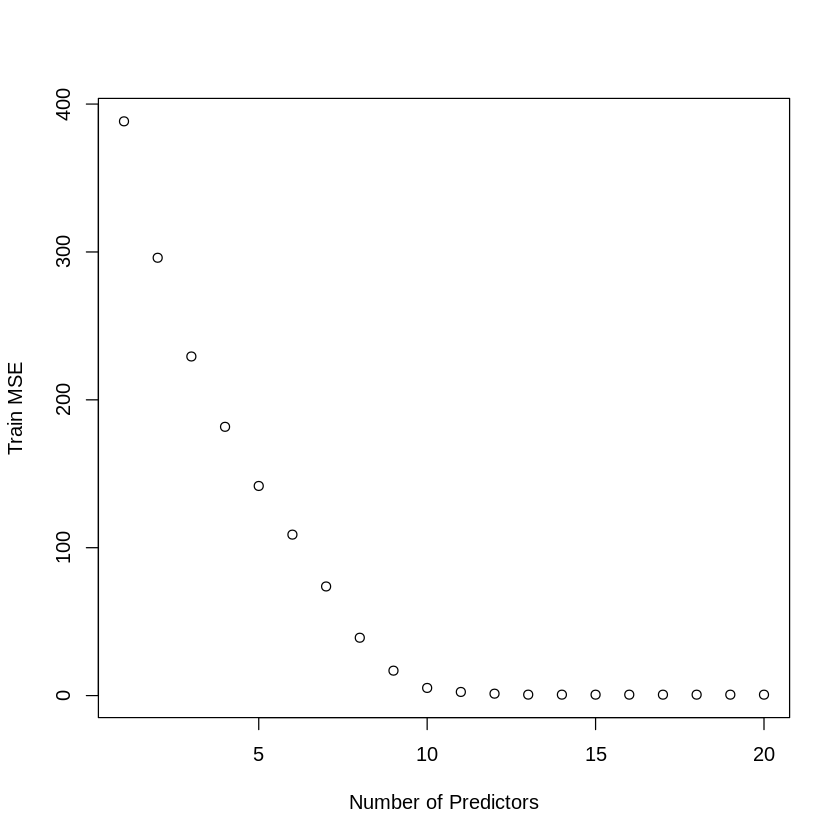

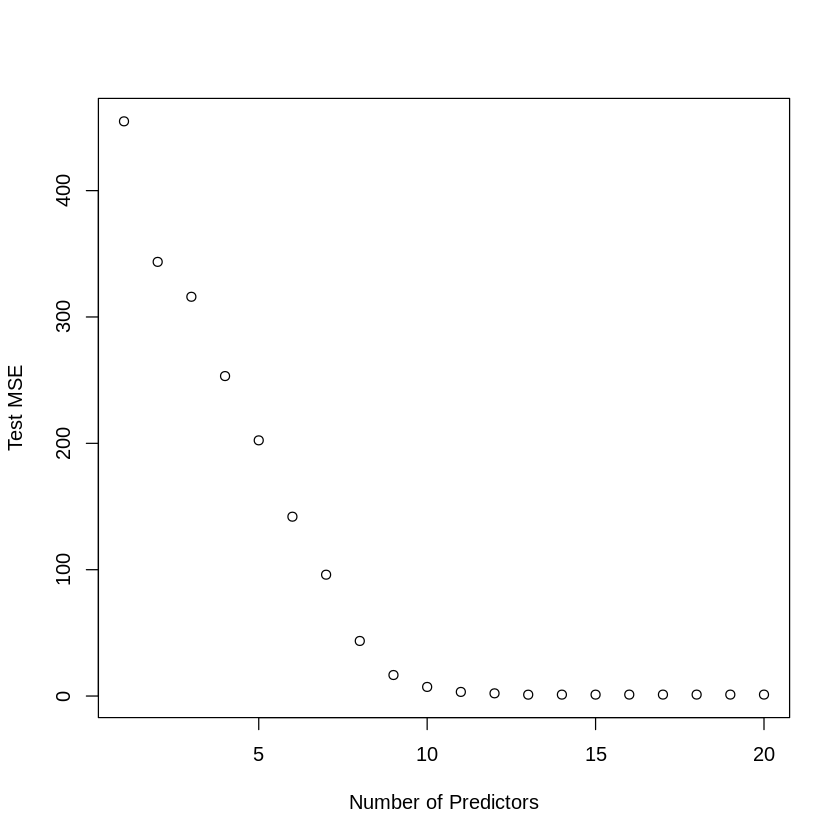

In [51]:
# Training MSE
train_matrix <- model.matrix(Y2 ~., data=train)
train_error <- rep(NA, p)
for (i in 1:p) {
  coefi = coef(train_model, id=i)
  pred = train_matrix[, names(coefi)] %*% coefi
  train_error[i] = mean((pred - train$Y2)^2) # Calculate MSE

}

plot(train_error,
xlab = "Number of Predictors",
ylab = "Train MSE")

# Test MSE
test_matrix <- model.matrix(Y2 ~., data=test)
test_error <- rep(NA, p)
for (i in 1:p) {
  coefi = coef(train_model, id=i)
  pred = test_matrix[, names(coefi)] %*% coefi
  test_error[i] = mean((pred - test$Y2)^2) # Calculate MSE

}

plot(test_error,
xlab = "Number of Predictors",
ylab = "Test MSE")

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [52]:
# WRITE YOUR CODE HERE
which.min(test_error)
best_model <- coef(train_model, id = 13)[-1] # Remove intercept
actual = beta[which(!beta %in% 0)]

best <- mean(best_model - actual)
print(best) # difference of -0.028


[1] 13

Warning message in best_model - actual:
“longer object length is not a multiple of shorter object length”


[1] -0.02769517


> *The best model according to the MSE was model 13. It differed from the actual model by only -0.028.* 
> 

**DUE:** 5pm EST, April 10, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Tracie E. and Adwoa A.*